<a href="https://colab.research.google.com/github/thisiskiks/AloPyek_Analysis/blob/main/AloPeyk_Task_KianaSammak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Preprocessing**




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "/content/drive/MyDrive/Colab Notebooks/AloPeyk_Task_KianaSammak/DataTask.xlsx"
df = pd.read_excel(file_path)

In [7]:
df.head()

,Date,OrderID,Final_Status,StoreID,City,DriverID,ConfirmationHour,CancelHour,FirstAssignDu,LastAssignDU,Diff_AssignTime_Minutes,Queue_DU,SourceArrival_DU,PickUp_DU,DestinationArrival_DU,Operation_DU,DistanceVendorToCustomer,DistanceBikerToVendor
0,1404/03/01,3010319,DeliveredWithDelay,74355,شیراز,557,0,**,20,20,0,20,7.0,21.0,9.0,57.0,5774,NaN
1,1404/03/11,3356049,Delivered,73135,تهران,762,20,**,55,55,0,55,NaN,NaN,8.0,63.0,5073,4090.0
2,1404/03/10,3300962,Delivered,53428,مشهد,179,13,**,6,6,0,6,10.0,2.0,8.0,27.0,4413,3885.0
3,1404/03/17,3552005,Delivered,73148,مشهد,693,19,**,1,1,0,1,6.0,0.0,0.0,9.0,1278,2109.0
4,1404/03/01,3010323,NaN,68930,تهران,654,0,01,12,66,54,66,5.0,NaN,NaN,NaN,2780,9573.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172994 entries, 0 to 172993
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      172994 non-null  object 
 1   OrderID                   172994 non-null  int64  
 2   Final_Status              171227 non-null  object 
 3   StoreID                   172994 non-null  int64  
 4   City                      172994 non-null  object 
 5   DriverID                  172994 non-null  int64  
 6   ConfirmationHour          172994 non-null  int64  
 7   CancelHour                172994 non-null  object 
 8   FirstAssignDu             172994 non-null  int64  
 9   LastAssignDU              172994 non-null  int64  
 10  Diff_AssignTime_Minutes   172994 non-null  int64  
 11  Queue_DU                  172994 non-null  int64  
 12  SourceArrival_DU          171952 non-null  float64
 13  PickUp_DU                 171163 non-null  f

In [9]:
df.describe()

,OrderID,StoreID,DriverID,ConfirmationHour,FirstAssignDu,LastAssignDU,Diff_AssignTime_Minutes,Queue_DU,SourceArrival_DU,PickUp_DU,DestinationArrival_DU,Operation_DU,DistanceVendorToCustomer,DistanceBikerToVendor
count,1.729940e+05,172994.000000,172994.000000,172994.000000,172994.000000,172994.000000,172994.000000,172994.000000,171952.000000,171163.000000,171892.000000,171892.000000,172994.000000,119128.000000
mean,3.312484e+06,42964.039371,549.610258,16.269258,4.415350,8.823381,4.408031,8.823381,7.110327,2.708313,9.888255,28.901560,3123.501121,2417.567406
std,1.803785e+05,25568.035653,254.051297,4.042358,8.666181,15.007240,11.911246,15.007240,7.580482,4.074343,7.798721,19.129146,1891.016732,1398.013489
min,3.002481e+06,2288.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.155236e+06,17133.000000,333.000000,13.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,5.000000,18.000000,1670.000000,1381.000000
50%,3.306667e+06,46770.000000,547.000000,16.000000,2.000000,3.000000,0.000000,3.000000,6.000000,1.000000,8.000000,24.000000,2888.000000,2196.500000
75%,3.468244e+06,66563.000000,769.000000,20.000000,4.000000,10.000000,3.000000,10.000000,9.000000,3.000000,12.000000,35.000000,4231.000000,3273.000000
max,3.629660e+06,81098.000000,999.000000,23.000000,573.000000,573.000000,481.000000,573.000000,1118.000000,296.000000,515.000000,1119.000000,19894.000000,21750.000000


In [10]:
%pip install jdatetime
import jdatetime as jt

In [11]:
def jalali_to_gregorian(jalali_date_str):
    """
    Convert a date in the Jalali calendar to Gregorian calendar.
    """
    try:
        parts = jalali_date_str.replace('-', '/').split('/')
        year, month, day = map(int, parts)

        gregorian_date = jt.date(year, month, day).togregorian()
        return gregorian_date

    except:
        return pd.NaT

In [12]:
# Converting jalali date to Gregorian
df['Date_Gregorian'] = df['Date'].apply(jalali_to_gregorian)

# creating a new column for converted date
df['Date_Gregorian'] = pd.to_datetime(df['Date_Gregorian'])

In [13]:
df['Year'] = df['Date_Gregorian'].dt.year
df['Month'] = df['Date_Gregorian'].dt.month

In [14]:
df['Week'] = df['Date_Gregorian'].dt.isocalendar().week

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172994 entries, 0 to 172993
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      172994 non-null  object        
 1   OrderID                   172994 non-null  int64         
 2   Final_Status              171227 non-null  object        
 3   StoreID                   172994 non-null  int64         
 4   City                      172994 non-null  object        
 5   DriverID                  172994 non-null  int64         
 6   ConfirmationHour          172994 non-null  int64         
 7   CancelHour                172994 non-null  object        
 8   FirstAssignDu             172994 non-null  int64         
 9   LastAssignDU              172994 non-null  int64         
 10  Diff_AssignTime_Minutes   172994 non-null  int64         
 11  Queue_DU                  172994 non-null  int64         
 12  So

In [16]:
round(((df.isnull().sum())/len(df) * 100),2)

,0
Date,0.00
OrderID,0.00
Final_Status,1.02
StoreID,0.00
City,0.00
DriverID,0.00
ConfirmationHour,0.00
CancelHour,0.00
FirstAssignDu,0.00
LastAssignDU,0.00


In [17]:
df['CancelHour'].unique()

array(['**', '01', '08', '11', '13', '12', '15', '14', '16', '17', '18',
       '19', '20', '21', '23', '22', '00', '07', '02', '10', '09', '03',
       '04'], dtype=object)

In [18]:
df['CancelHour'].replace('**',np.nan,inplace=True)

/tmp/ipython-input-2626892249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CancelHour'].replace('**',np.nan,inplace=True)


In [19]:
df['CancelHour'] = pd.to_numeric(df['CancelHour'], errors='coerce')

In [20]:
df['Final_Status'].replace('Canceled','Cancelled',inplace=True)

/tmp/ipython-input-3357389404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Final_Status'].replace('Canceled','Cancelled',inplace=True)


In [21]:
# checking missing values in Final_Status Column
condition_missing_status = df['Final_Status'].isna()
# checking cancelled requests
condition_has_cancel_hour = df['CancelHour'].notna()
condition_to_fill = condition_missing_status & condition_has_cancel_hour

In [22]:
df.loc[condition_to_fill, 'Final_Status'] = 'Cancelled'

In [23]:
# Print the number of rows that were filled
print(f"Number of Final_Status rows imputed as 'Cancelled': {condition_to_fill.sum()}")

# Check the remaining NaN count in Final_Status
print(f"Remaining NaN count in Final_Status: {df['Final_Status'].isna().sum()}")

Number of Final_Status rows imputed as 'Cancelled': 65
Remaining NaN count in Final_Status: 1702


In [24]:
# Identify rows where 'Final_Status' is missing (NaN) BUT 'Operation_DU' exists (Not NaN)
mask_fix_status = df['Final_Status'].isna() & df['Operation_DU'].notna()
df.loc[mask_fix_status, 'Final_Status'] = 'Delivered'
print(f"Number of rows imputed as 'Delivered': {mask_fix_status.sum()}")

Number of rows imputed as 'Delivered': 1702


In [25]:
df = df[df['Final_Status'] != 'Cancelled'].copy()

In [26]:
df.describe()

,OrderID,StoreID,DriverID,ConfirmationHour,CancelHour,FirstAssignDu,LastAssignDU,Diff_AssignTime_Minutes,Queue_DU,SourceArrival_DU,PickUp_DU,DestinationArrival_DU,Operation_DU,DistanceVendorToCustomer,DistanceBikerToVendor,Date_Gregorian,Year,Month,Week
count,1.718920e+05,171892.000000,171892.000000,171892.000000,1.0,171892.000000,171892.000000,171892.000000,171892.000000,171163.000000,171163.000000,171892.000000,171892.000000,171892.000000,118032.000000,171892,171892.0,171892.000000,171892.0
mean,3.312510e+06,42934.938985,549.578765,16.265580,19.0,4.394672,8.480156,4.085484,8.480156,7.138616,2.708313,9.888255,28.901560,3122.314250,2409.216577,2025-05-30 23:03:37.727410432,2025.0,5.470022,22.244927
min,3.002481e+06,2288.000000,100.000000,0.000000,19.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2025-05-22 00:00:00,2025.0,5.000000,21.0
25%,3.155338e+06,17128.000000,333.000000,13.000000,19.0,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,5.000000,18.000000,1668.000000,1377.000000,2025-05-26 00:00:00,2025.0,5.000000,22.0
50%,3.306688e+06,46750.000000,547.000000,16.000000,19.0,2.000000,3.000000,0.000000,3.000000,6.000000,1.000000,8.000000,24.000000,2885.000000,2190.000000,2025-05-31 00:00:00,2025.0,5.000000,22.0
75%,3.468238e+06,66563.000000,769.000000,20.000000,19.0,4.000000,9.000000,2.000000,9.000000,9.000000,3.000000,12.000000,35.000000,4230.000000,3262.000000,2025-06-05 00:00:00,2025.0,6.000000,23.0
max,3.629660e+06,81098.000000,999.000000,23.000000,19.0,573.000000,573.000000,259.000000,573.000000,1118.000000,296.000000,515.000000,1119.000000,19894.000000,21750.000000,2025-06-09 00:00:00,2025.0,6.000000,24.0
std,1.803439e+05,25574.031214,254.096968,4.033903,NaN,8.614879,13.879938,10.593438,13.879938,7.330355,4.074343,7.798721,19.129146,1891.725989,1389.157668,NaN,0.0,0.499102,0.840197


### Handling extreme Outliers

---



In [27]:
time_cols = ['FirstAssignDu','LastAssignDU','Diff_AssignTime_Minutes','Queue_DU','SourceArrival_DU','PickUp_DU',
             'DestinationArrival_DU','Operation_DU']

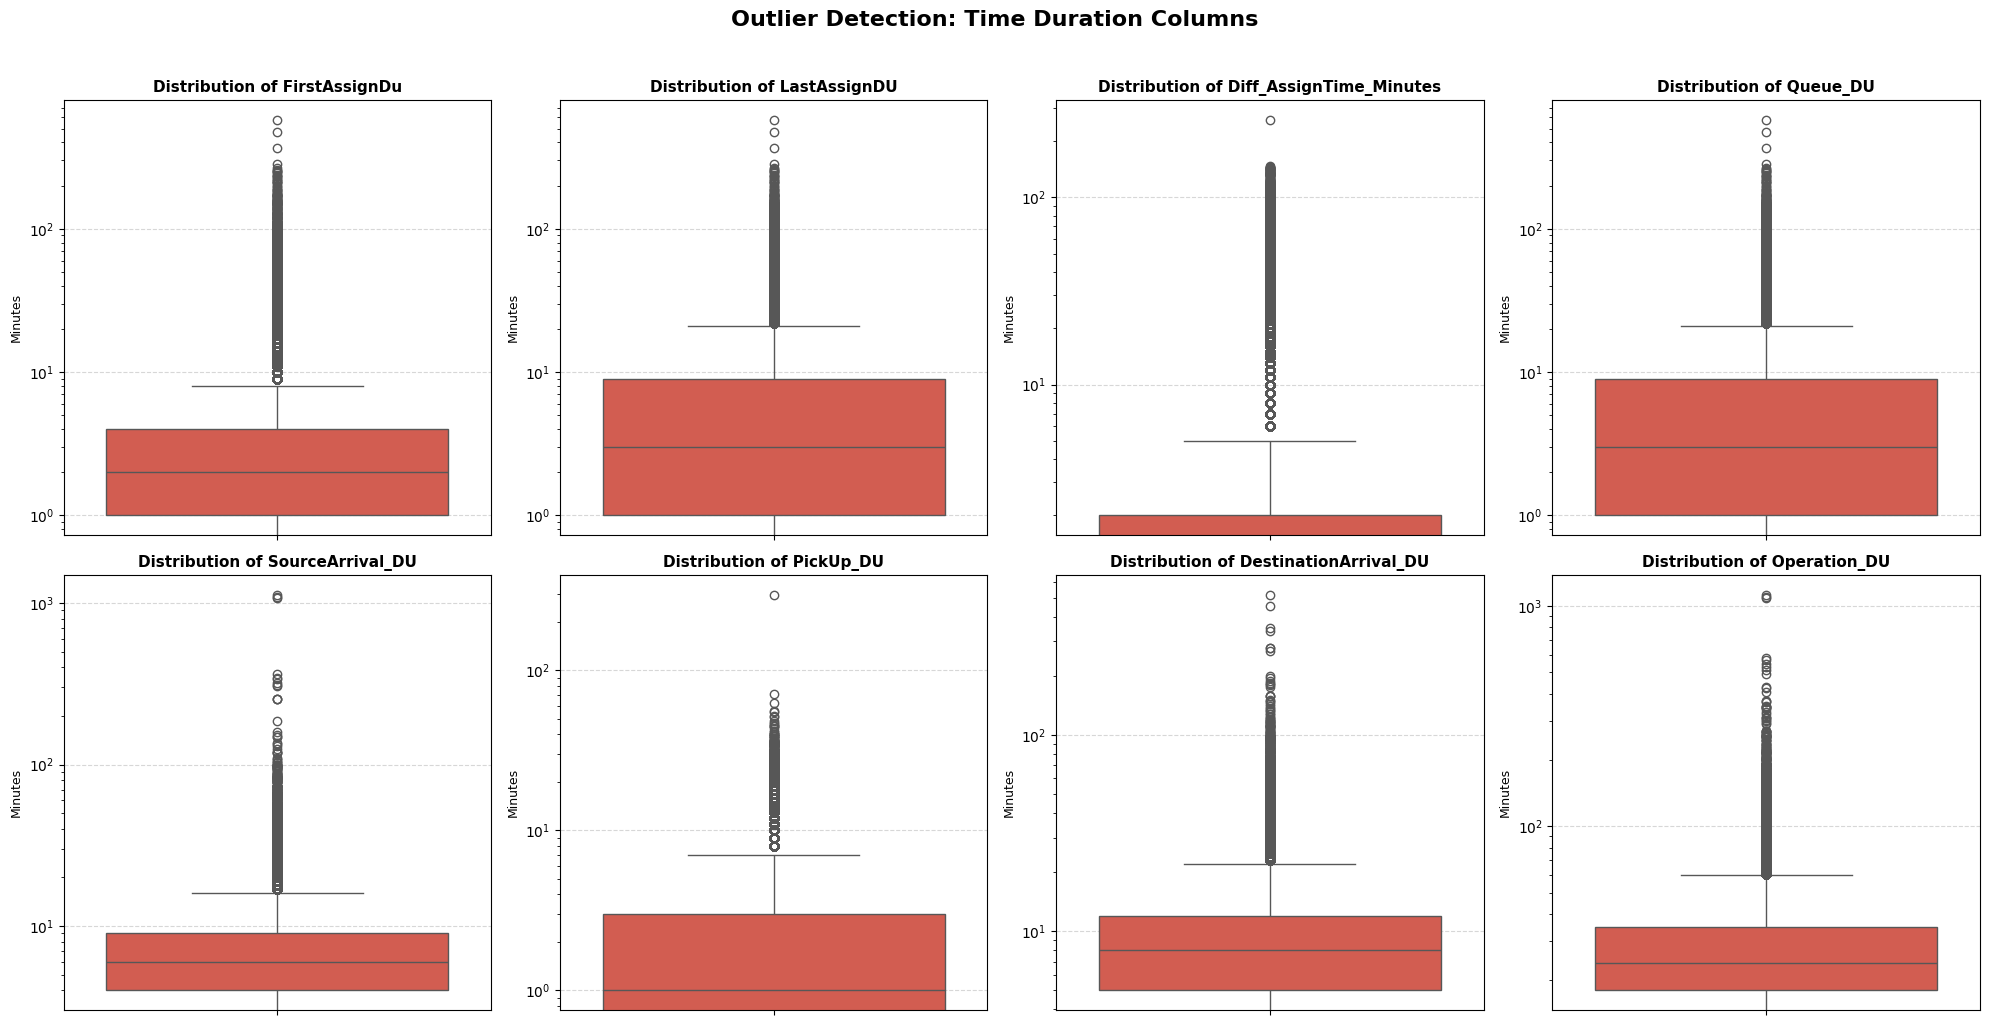

In [28]:
# Set up the figure size
plt.figure(figsize=(20, 10))

# Loop to create a subplot for each column
for i, col in enumerate(time_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns

    # Create Boxplot
    sns.boxplot(y=df[col], color='#e74c3c',showfliers=True)
    plt.yscale('log')
    # Chart styling
    plt.title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    plt.ylabel('Minutes', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Outlier Detection: Time Duration Columns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [29]:
hyper_delay_threshold = 60
df['Is_Hyperdelayed'] = (df['Operation_DU'] > hyper_delay_threshold).astype(int)

In [30]:
hyper_delayed_counts = df['Is_Hyperdelayed'].value_counts()
hyper_delayed = hyper_delayed_counts.get(1, 0) # Get count for 1, default to 0 if not present
normal = hyper_delayed_counts.get(0, 0) # Get count for 0, default to 0 if not present
hyper_delayed_percent=df['Is_Hyperdelayed'].value_counts(normalize=True)*100


print(f"Hyper-delayed orders: {hyper_delayed}")
print(f"Normal orders: {normal}")
print(f"Hyper-delayed orders percentage: {hyper_delayed_percent[1]:.2f}%")

Hyper-delayed orders: 9305
Normal orders: 162587
Hyper-delayed orders percentage: 5.41%


In [31]:
# --- Optimized & Vectorized Outlier Removal ---

print("--- Calculating 99.9th Percentile Thresholds ---")

# 1. Calculate all quantiles at once (Returns a Series)
limits = df[time_cols].quantile(0.999)

for col, limit in limits.items():
    print(f"Threshold for {col:<25}: {limit:.1f} minutes")

# 2. Create a single Boolean Mask
mask = (df[time_cols] <= limits).all(axis=1)

# 3. Apply the mask ONCE
df_clean = df[mask].copy()

# 4. Final Summary
initial_rows = len(df)
removed_rows = initial_rows - len(df_clean)

print(f"\n--- Cleaning Summary ---")
print(f"Original Rows: {initial_rows}")
print(f"Cleaned Rows:  {len(df_clean)}")
print(f"Rows Removed:  {removed_rows} ({(removed_rows/initial_rows)*100:.2f}%)")

# Create a new dataframe
df_analysis = df_clean.copy()

--- Calculating 99.9th Percentile Thresholds ---
Threshold for FirstAssignDu            : 94.0 minutes
Threshold for LastAssignDU             : 125.0 minutes
Threshold for Diff_AssignTime_Minutes  : 98.0 minutes
Threshold for Queue_DU                 : 125.0 minutes
Threshold for SourceArrival_DU         : 56.0 minutes
Threshold for PickUp_DU                : 29.0 minutes
Threshold for DestinationArrival_DU    : 74.1 minutes
Threshold for Operation_DU             : 168.2 minutes

--- Cleaning Summary ---
Original Rows: 171892
Cleaned Rows:  170496
Rows Removed:  1396 (0.81%)




---


# **Step 2: Design Insightful KPIs for Cities, Stores and Bikers**

### City KPIs

---



In [32]:
city_mapping = {
    'تهران': 'Tehran',
    'مشهد': 'Mashhad',
    'شیراز': 'Shiraz'
}

df_analysis['City'] = df_analysis['City'].replace(city_mapping)

In [33]:
df_analysis.head()

,Date,OrderID,Final_Status,StoreID,City,DriverID,ConfirmationHour,CancelHour,FirstAssignDu,LastAssignDU,...,PickUp_DU,DestinationArrival_DU,Operation_DU,DistanceVendorToCustomer,DistanceBikerToVendor,Date_Gregorian,Year,Month,Week,Is_Hyperdelayed
0,1404/03/01,3010319,DeliveredWithDelay,74355,Shiraz,557,0,NaN,20,20,...,21.0,9.0,57.0,5774,NaN,2025-05-22,2025,5,21,0
2,1404/03/10,3300962,Delivered,53428,Mashhad,179,13,NaN,6,6,...,2.0,8.0,27.0,4413,3885.0,2025-05-31,2025,5,22,0
3,1404/03/17,3552005,Delivered,73148,Mashhad,693,19,NaN,1,1,...,0.0,0.0,9.0,1278,2109.0,2025-06-07,2025,6,23,0
5,1404/03/01,3010343,DeliveredWithDelay,25405,Mashhad,403,0,NaN,9,29,...,1.0,0.0,35.0,9,NaN,2025-05-22,2025,5,21,0
6,1404/03/05,3136476,Delivered,58090,Tehran,277,12,NaN,1,1,...,3.0,6.0,26.0,1084,NaN,2025-05-26,2025,5,22,0


In [171]:

df_analysis['Is_OnTime'] = (df_analysis['Operation_DU'] <= 40).astype(int)

city_scorecard = df_analysis.groupby('City').agg({
    'OrderID': 'count',
    'Is_Hyperdelayed': 'mean',        # 1. Service Failure Rate
    'Is_OnTime': 'mean',              # 2. On-Time Performance
    'Queue_DU': 'mean',               # 3. Supply Response Time
    'Diff_AssignTime_Minutes': 'mean',# 4. Assignment Friction Index
    'PickUp_DU': 'mean',              # 5. Vendor Latency
    'DestinationArrival_DU': 'mean'   # 6. Last Mile Efficiency
}).round(2).reset_index()

city_scorecard.columns = [
    'City',
    'Order_Volume',
    'Service_Failure_Rate',
    'On_Time_Performance',
    'Avg_Supply_Response',
    'Assignment_Friction',
    'Avg_Vendor_Latency',
    'Last_Mile_Efficiency'
]

city_scorecard['Service_Failure_Rate'] = city_scorecard['Service_Failure_Rate'] * 100
city_scorecard['On_Time_Performance'] = city_scorecard['On_Time_Performance'] * 100

city_scorecard = city_scorecard.sort_values('Service_Failure_Rate', ascending=False)

print("--- City Operational Scorecard ---")
print(city_scorecard)

--- City Operational Scorecard ---
      City  Order_Volume  Service_Failure_Rate  On_Time_Performance  \
1   Shiraz         10742                   6.0                 79.0   
2   Tehran         96699                   6.0                 82.0   
0  Mashhad         63055                   4.0                 86.0   

   Avg_Supply_Response  Assignment_Friction  Avg_Vendor_Latency  \
1                 9.79                 3.72                4.25   
2                 8.78                 4.83                2.06   
0                 6.70                 2.71                3.37   

   Last_Mile_Efficiency  
1                  8.94  
2                  9.78  
0                  9.93  


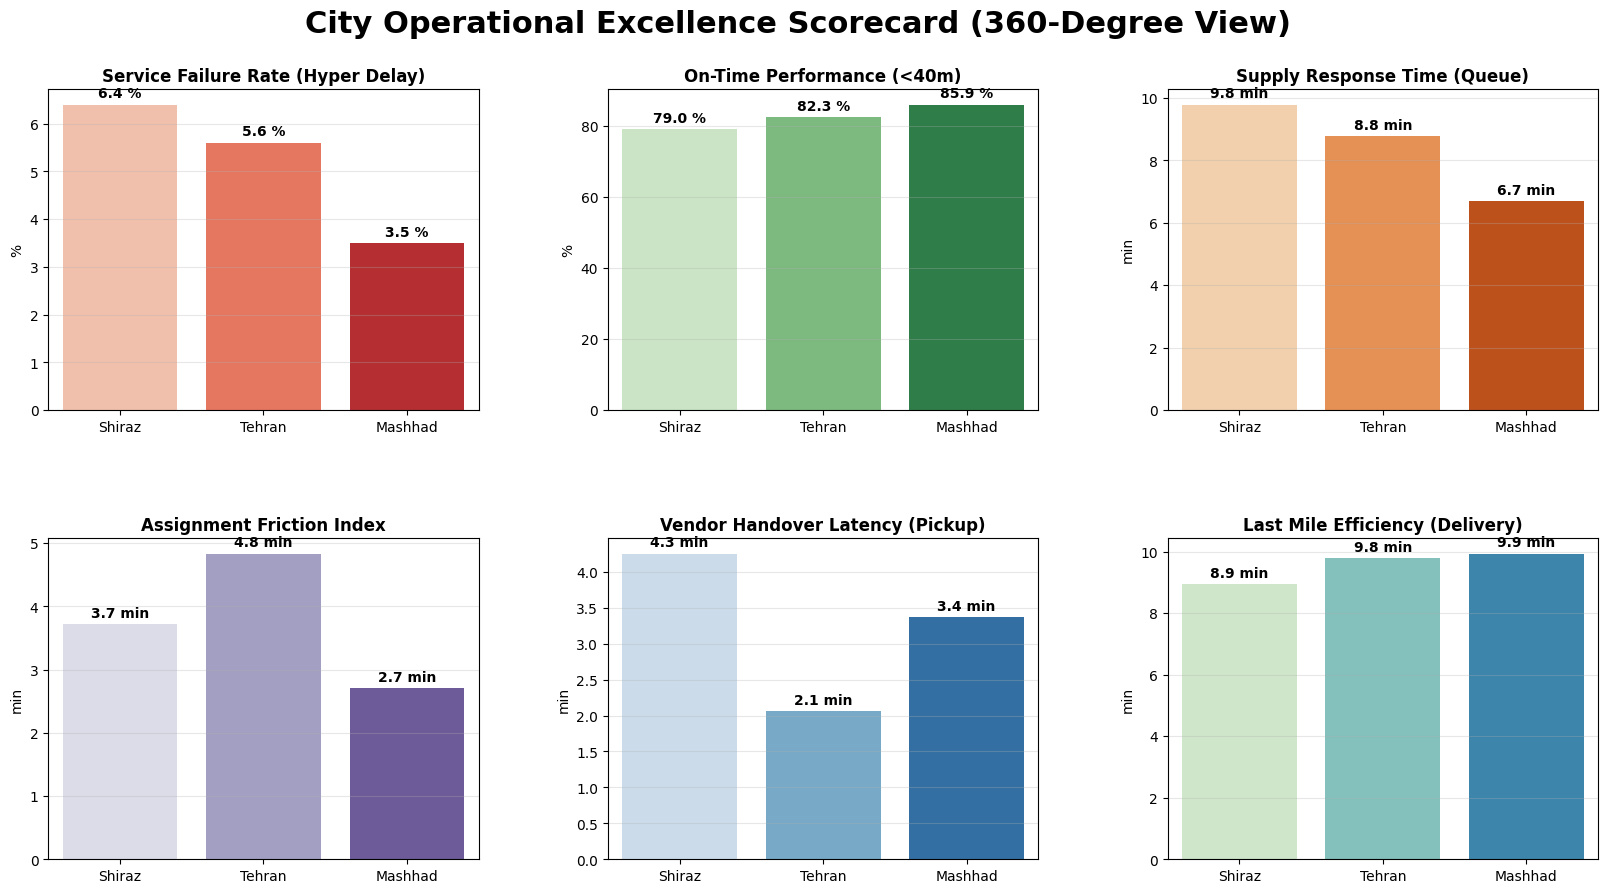

In [35]:
kpis_to_plot = [
    ('Service_Failure_Rate', 'Service Failure Rate (Hyper Delay)', '%', 'Reds'),
    ('On_Time_Performance', 'On-Time Performance (<40m)', '%', 'Greens'),
    ('Avg_Supply_Response', 'Supply Response Time (Queue)', 'min', 'Oranges'),
    ('Assignment_Friction', 'Assignment Friction Index', 'min', 'Purples'),
    ('Avg_Vendor_Latency', 'Vendor Handover Latency (Pickup)', 'min', 'Blues'),
    ('Last_Mile_Efficiency', 'Last Mile Efficiency (Delivery)', 'min', 'GnBu')
]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, (col, title, unit, color_palette) in enumerate(kpis_to_plot):
    ax = axes[i]

    sns.barplot(
        data=city_scorecard,
        x='City',
        y=col,
        ax=ax,
        hue='City',
        palette=color_palette
    )

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(unit)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.3)

    for container in ax.containers:
        labels = [f'{v.get_height():.1f} {unit}' for v in container]
        ax.bar_label(container, labels=labels, padding=3, fontsize=10, fontweight='bold')


plt.suptitle('City Operational Excellence Scorecard (360-Degree View)', fontsize=22, fontweight='bold', y=0.96)

plt.show()

In [36]:
heatmap_data = df_analysis.pivot_table(
    index='City',
    columns='ConfirmationHour',
    values='Is_Hyperdelayed',
    aggfunc='mean'
)*100

daily_trend = df_analysis.groupby(['Date_Gregorian','City'])['Is_Hyperdelayed'].mean().reset_index()
daily_trend['Is_Hyperdelayed'] = round(daily_trend['Is_Hyperdelayed']*100,2)


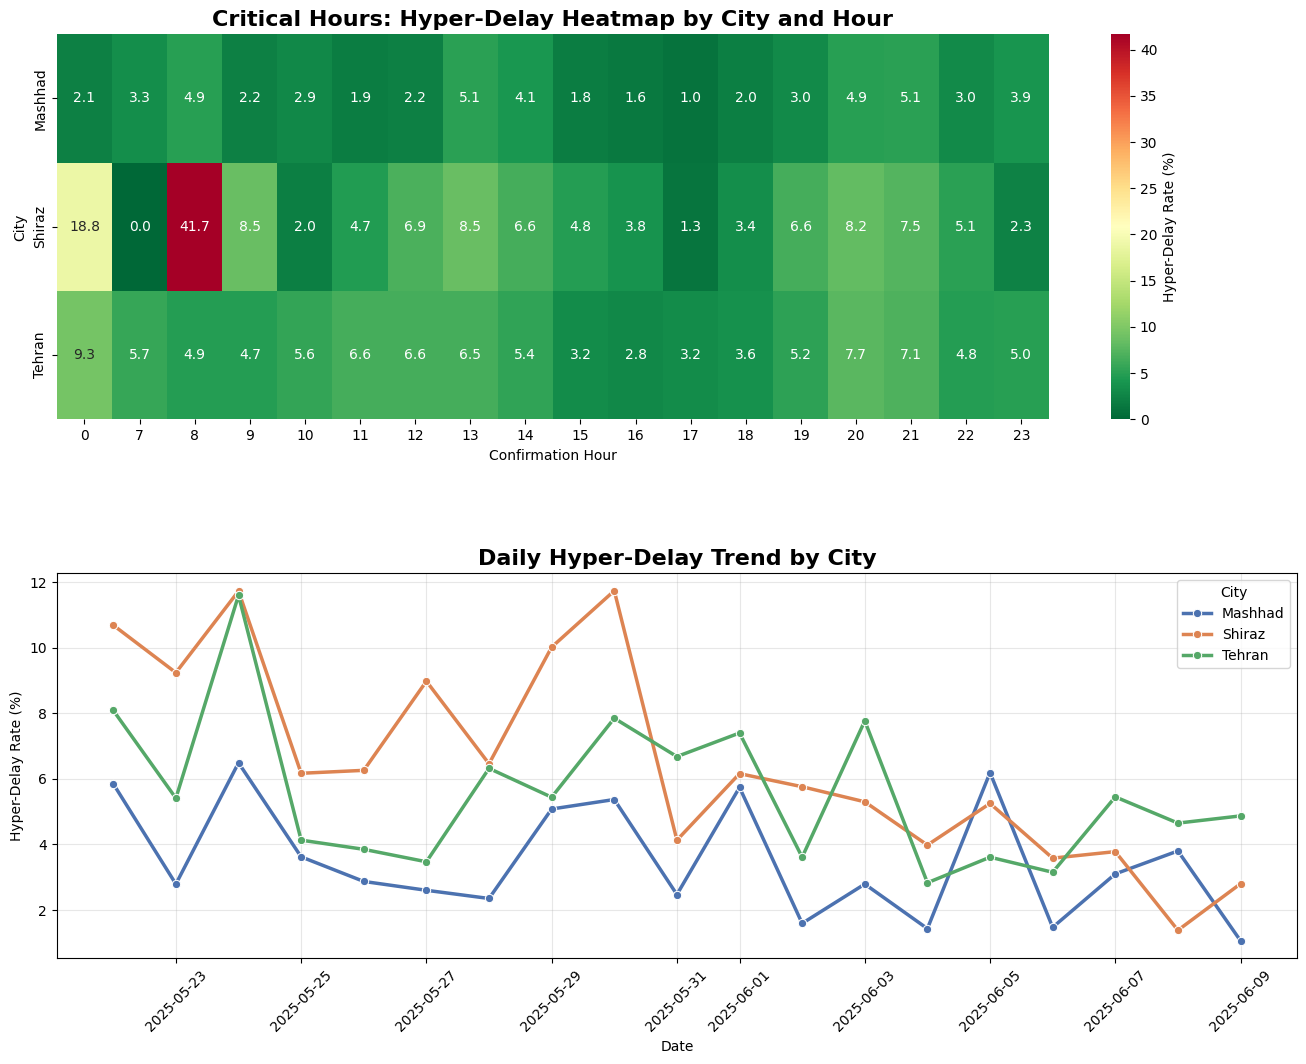

In [37]:
fig, axes = plt.subplots(2,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',
    annot=True,
    fmt='.1f',
    cbar_kws={'label': 'Hyper-Delay Rate (%)'},
    ax=axes[0]
)
axes[0].set_title('Critical Hours: Hyper-Delay Heatmap by City and Hour',fontsize=16,fontweight='bold')
axes[0].set_xlabel('Confirmation Hour')
axes[0].set_ylabel('City')

sns.lineplot(
    data=daily_trend,
    x='Date_Gregorian',
    y='Is_Hyperdelayed',
    hue='City',
    marker='o',
    linewidth=2.5,
    palette='deep',
    ax=axes[1]
)
axes[1].set_title('Daily Hyper-Delay Trend by City',fontsize=16,fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Hyper-Delay Rate (%)')
axes[1].grid(True,alpha=0.3)
axes[1].legend(title='City',loc='upper right')

plt.setp(axes[1].get_xticklabels(),rotation=45)

plt.show()

### Store KPIs

---



In [38]:
store_kpis=df_analysis.groupby(['StoreID','City']).agg({
    'OrderID':'count',
    'PickUp_DU':'mean',
    'Is_Hyperdelayed':'mean'
}
).reset_index()
store_kpis.columns=['StoreID','City','Total_Orders','Avg_Pickup_Time','Hyper_Delay_Rate']
store_kpis['Hyper_Delay_Rate']=round(store_kpis['Hyper_Delay_Rate']*100,1)

#Filtering based on a minimum average of ~1 order/day across the 20-day dataset
active_stores = store_kpis[store_kpis['Total_Orders'] > 20].copy()
#Defining a Threshold for slow stores.
threshold_value = active_stores['Avg_Pickup_Time'].quantile(0.75)
print(f"Calculated Warning Threshold (75th Percentile): {threshold_value:.1f} minutes")


Calculated Warning Threshold (75th Percentile): 3.5 minutes


In [39]:
print(store_kpis['Total_Orders'].describe())

count    5118.000000
mean       33.313013
std        70.043210
min         1.000000
25%         3.000000
50%        10.000000
75%        31.000000
max      1150.000000
Name: Total_Orders, dtype: float64


In [40]:
# Binning (Categorizing Stores)
# We group stores based on their Prep Time into ranges
bins = [0, 5, 10, 15, 20, 100]
labels = ['0-5m (Fast)', '5-10m (Normal)', '10-15m (Slow)', '15-20m (Very Slow)', '20m+ (Critical)']

active_stores['Prep_Time_Category'] = pd.cut(
    active_stores['Avg_Pickup_Time'],
    bins=bins,
    labels=labels
)

# Calculate Delay Rate for each Category
category_impact = active_stores.groupby('Prep_Time_Category', observed=True)['Hyper_Delay_Rate'].mean().reset_index()

slowest_stores = active_stores.sort_values(by='Avg_Pickup_Time', ascending=False).head(10)

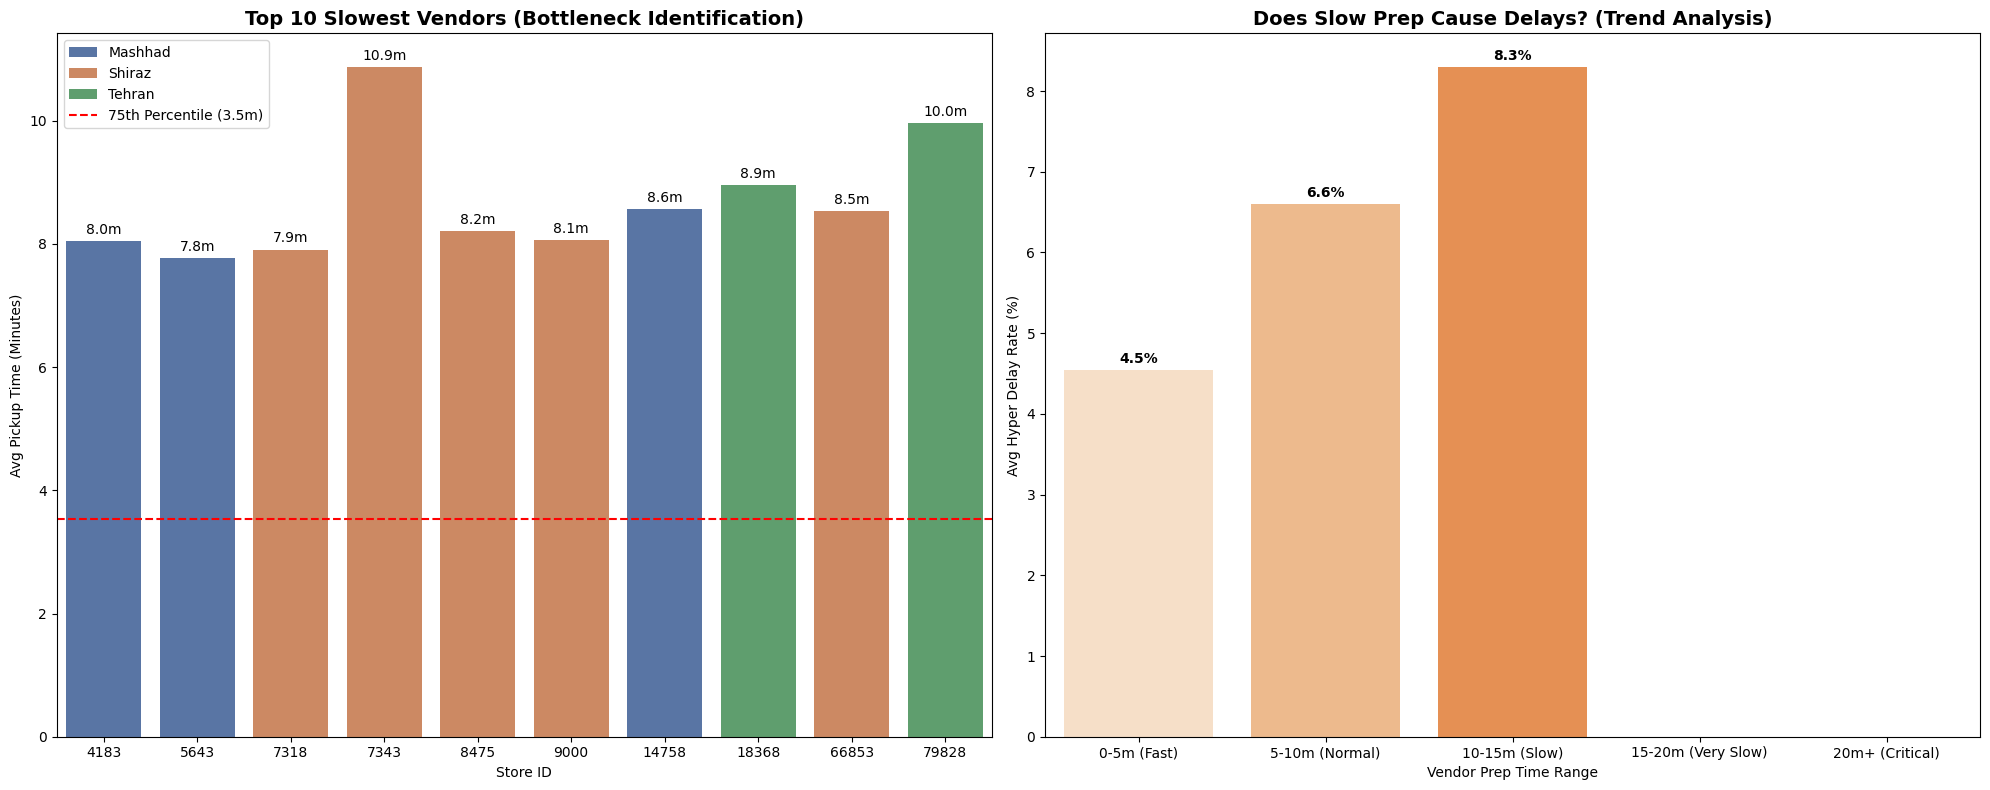

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(
    data=slowest_stores,
    x='StoreID',
    y='Avg_Pickup_Time',
    hue='City',
    palette='deep',
    dodge=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 Slowest Vendors (Bottleneck Identification)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Avg Pickup Time (Minutes)')
axes[0].set_xlabel('Store ID')
axes[0].axhline(y=threshold_value, color='red', linestyle='--', label=f'75th Percentile ({threshold_value:.1f}m)')
axes[0].legend()

# Add labels
for container in axes[0].containers:
    labels_txt = [f'{v.get_height():.1f}m' for v in container]
    axes[0].bar_label(container, labels=labels_txt, padding=3)

# --- Plot 2: Prep Time Impact Analysis (The Trend)

sns.barplot(
    data=category_impact,
    x='Prep_Time_Category',
    y='Hyper_Delay_Rate',
    palette='Oranges',
    hue='Prep_Time_Category',
    dodge=False,
    ax=axes[1]
)

axes[1].set_title('Does Slow Prep Cause Delays? (Trend Analysis)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Avg Hyper Delay Rate (%)')
axes[1].set_xlabel('Vendor Prep Time Range')

# Add labels
for container in axes[1].containers:
    labels_txt = [f'{v.get_height():.1f}%' for v in container]
    axes[1].bar_label(container, labels=labels_txt, padding=3, fontweight='bold')

plt.tight_layout()
plt.show()

### Biker KPIs

---



1. Order Volume Share

In [72]:
# We need to know the total market size for each city on each specific day.
daily_city_vol = df_analysis.groupby(['Date_Gregorian', 'City'])['OrderID'].count().reset_index()
daily_city_vol.columns = ['Date', 'City', 'City_Daily_Total']


# We count how many orders each specific driver delivered in that specific city and date.
daily_biker_vol = df_analysis.groupby(['Date_Gregorian', 'City', 'DriverID'])['OrderID'].count().reset_index()
daily_biker_vol.columns = ['Date', 'City', 'DriverID', 'Biker_Daily_Orders']


# We join the biker data with the city totals to calculate the share.
biker_share_analysis = pd.merge(daily_biker_vol, daily_city_vol, on=['Date', 'City'])

biker_share_analysis['Daily_Share_Rate'] = (biker_share_analysis['Biker_Daily_Orders'] / biker_share_analysis['City_Daily_Total']) * 100


# Now we create a summary profile for each biker based on their history.
biker_activity_kpi = biker_share_analysis.groupby(['City', 'DriverID']).agg({
    'Daily_Share_Rate': 'mean',      # Avg market share on active days
    'Biker_Daily_Orders': 'mean',   # Avg orders per day (Intensity)
    'Date': 'nunique'               # Number of Active Days (Consistency)
}).reset_index()


biker_activity_kpi.columns = ['City', 'DriverID', 'Avg_Biker_Share', 'Avg_Daily_Orders', 'Active_Days']

# --- Output: Show Top 3 Power Users per City ---
print("--- Top Power Bikers per City (Highest Local Market Share) ---")
top_per_city = biker_activity_kpi.sort_values(['City', 'Avg_Biker_Share'], ascending=[True, False]).groupby('City').head(3)
top_per_city

--- Top Power Bikers per City (Highest Local Market Share) ---


,City,DriverID,Avg_Biker_Share,Avg_Daily_Orders,Active_Days
392,Mashhad,492,0.470059,15.526316,19
466,Mashhad,566,0.405753,13.526316,19
134,Mashhad,234,0.392971,13.157895,19
1079,Shiraz,279,1.675281,9.388889,18
1691,Shiraz,891,1.626492,9.176471,17
1638,Shiraz,838,1.335114,7.611111,18
2572,Tehran,872,0.274510,14.105263,19
2046,Tehran,346,0.271528,13.789474,19
2216,Tehran,516,0.251483,12.947368,19


2. Speed and Quality

In [71]:
# We need to calculate speed per trip to aggregate it later
df_metrics = df_analysis.copy()

# Calculate Speed (km/h) for the Last Mile (Vendor to Customer)
# We use 'DestinationArrival_DU' as the duration for the delivery leg
df_metrics['Speed_LastMile_kmh'] = (df_metrics['DistanceVendorToCustomer'] / 1000) / (df_metrics['DestinationArrival_DU'] / 60)

# SANITY CHECK: Remove GPS errors (e.g., Speed > 120 km/h)
df_metrics_clean = df_metrics[df_metrics['Speed_LastMile_kmh'] <= 120].copy()

biker_performance = df_metrics_clean.groupby(['City', 'DriverID']).agg({
    'Speed_LastMile_kmh': 'mean',    # KPI 1: Avg Speed (Efficiency)
    'Is_Hyperdelayed': 'mean',         # KPI 2: Failure Rate (Reliability)
    'SourceArrival_DU': 'mean'       # KPI 3: Avg Time to Arrive at Vendor (Agility)
}).reset_index()

biker_performance.columns = ['City', 'DriverID', 'Avg_Speed_kmh', 'Hyper_Delay_Rate', 'Avg_Time_To_Store']

biker_performance['Hyper_Delay_Rate'] = biker_performance['Hyper_Delay_Rate'] * 100

# We use 'biker_activity_kpi' from the previous step
full_biker_profile = pd.merge(biker_activity_kpi, biker_performance, on=['City', 'DriverID'])

# Show the top 3 most active bikers again, now with their speed and quality stats
print("---Top 3 most active bikers based on speed and quality---")
full_biker_profile.sort_values(['City','Avg_Biker_Share','Avg_Speed_kmh'], ascending=[True,False,False]).groupby('City').head(3)

---Top 3 most active bikers based on speed and quality---


,City,DriverID,Avg_Biker_Share,Avg_Daily_Orders,Active_Days,Avg_Speed_kmh,Hyper_Delay_Rate,Avg_Time_To_Store
392,Mashhad,492,0.470059,15.526316,19,25.362515,0.358423,4.838710
466,Mashhad,566,0.405753,13.526316,19,21.459410,1.200000,5.828000
134,Mashhad,234,0.392971,13.157895,19,22.339033,4.545455,6.826446
1079,Shiraz,279,1.675281,9.388889,18,24.127059,3.048780,6.109756
1691,Shiraz,891,1.626492,9.176471,17,22.500713,7.051282,5.153846
1638,Shiraz,838,1.335114,7.611111,18,22.818932,6.766917,5.962406
2572,Tehran,872,0.274510,14.105263,19,20.158846,8.365019,7.334601
2046,Tehran,346,0.271528,13.789474,19,17.630779,5.882353,6.949020
2216,Tehran,516,0.251483,12.947368,19,21.912670,7.468880,7.041494


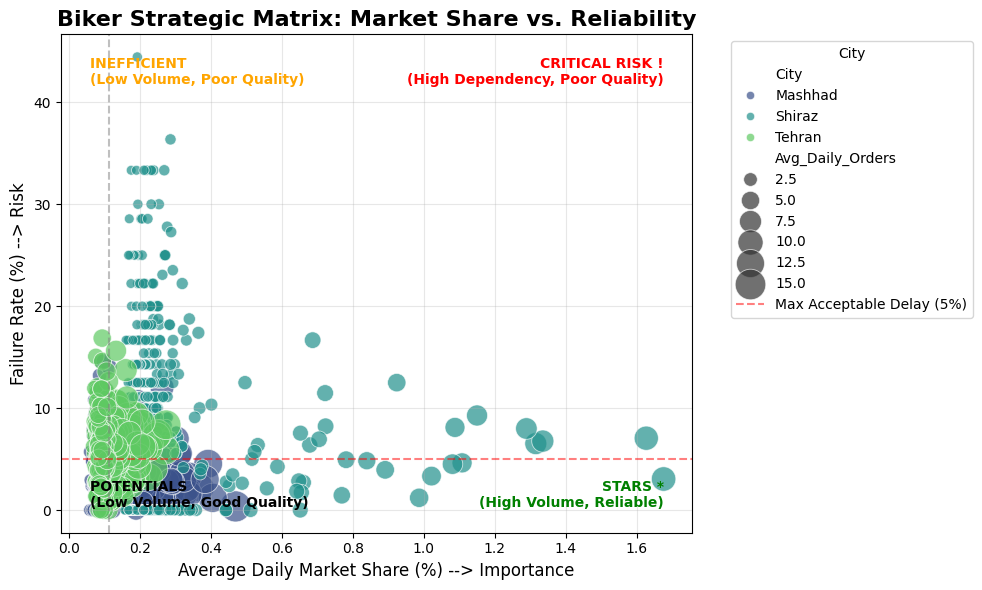

In [97]:
core_fleet_analysis = full_biker_profile[full_biker_profile['Active_Days'] > 5].copy()

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter Plot: Market Share vs. Reliability
# X-axis: How important are they? (Share)
# Y-axis: How reliable are they? (Delay Rate)
sns.scatterplot(
    data=core_fleet_analysis,
    x='Avg_Biker_Share',
    y='Hyper_Delay_Rate',
    hue='City',
    size='Avg_Daily_Orders', # Size bubbles by volume
    sizes=(50, 500),
    palette='viridis',
    alpha=0.7,
    ax=ax
)

# Vertical Line: Median Market Share (Left = Small Players, Right = Key Players)
median_share = core_fleet_analysis['Avg_Biker_Share'].median()
ax.axvline(x=median_share, color='gray', linestyle='--', alpha=0.5)

# Horizontal Line: Acceptable Delay Threshold (e.g., 5%)
ACCEPTABLE_DELAY = 5
ax.axhline(y=ACCEPTABLE_DELAY, color='red', linestyle='--', alpha=0.5, label=f'Max Acceptable Delay ({ACCEPTABLE_DELAY}%)')

# High Risk Zone (Top-Right): High Share but Bad Quality
ax.text(x=core_fleet_analysis['Avg_Biker_Share'].max(), y=core_fleet_analysis['Hyper_Delay_Rate'].max(),
        s="CRITICAL RISK !\n(High Dependency, Poor Quality)",
        color='red', fontweight='bold', ha='right', va='top')

# Star Zone (Bottom-Right): High Share and Good Quality
ax.text(x=core_fleet_analysis['Avg_Biker_Share'].max(), y=0,
        s="STARS *\n(High Volume, Reliable)",
        color='green', fontweight='bold', ha='right', va='bottom')
# Churn Zone (Top-Left): Low Share and Low Quality
ax.text(x=core_fleet_analysis['Avg_Biker_Share'].min(),
        y=core_fleet_analysis['Hyper_Delay_Rate'].max(),
        s="INEFFICIENT \n(Low Volume, Poor Quality)",
        color='orange', fontweight='bold', ha='left', va='top', fontsize=10)
# High Potential Bikers: Low Share but High Quality
ax.text(x=core_fleet_analysis['Avg_Biker_Share'].min(),
        y=0,
        s="POTENTIALS \n(Low Volume, Good Quality)",
        color='black', fontweight='bold', ha='left', va='bottom', fontsize=10)

ax.set_title('Biker Strategic Matrix: Market Share vs. Reliability', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Daily Market Share (%) --> Importance', fontsize=12)
ax.set_ylabel('Failure Rate (%) --> Risk', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='City')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Step 3: Anomaly Detection**

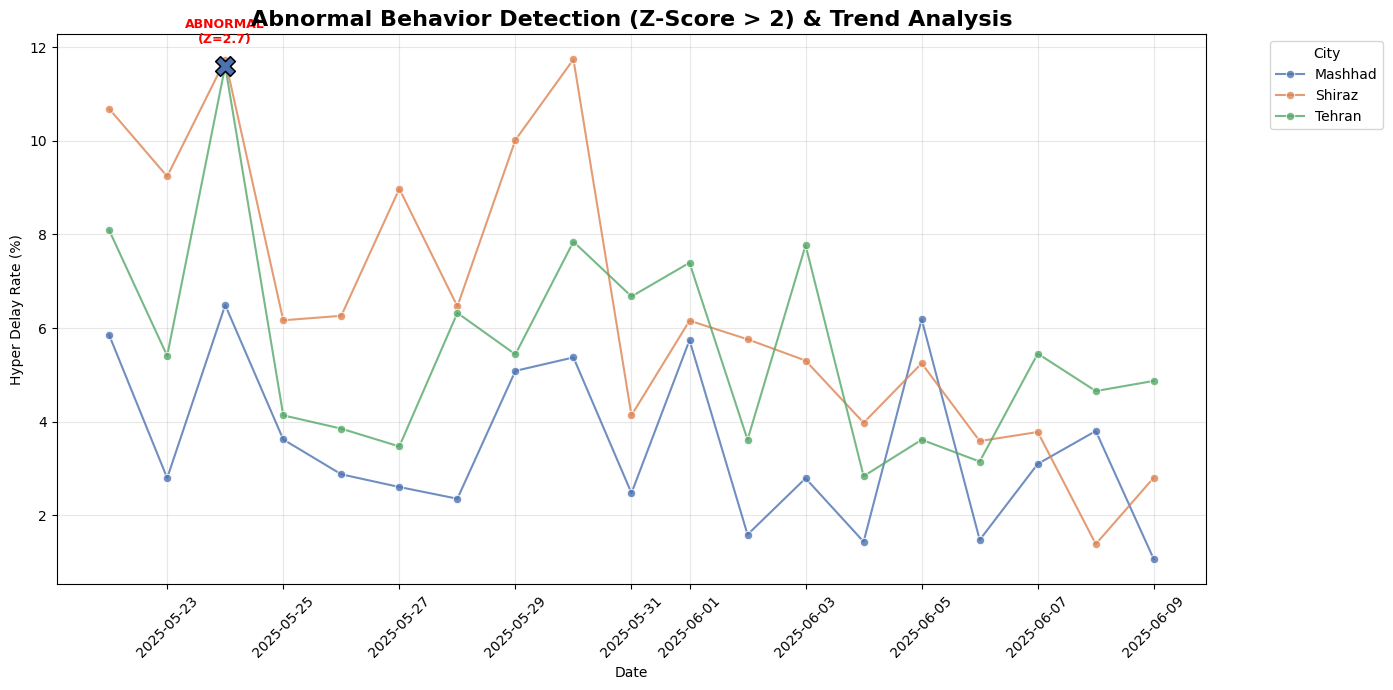

In [118]:
# Calculate daily failure rate for each city
daily_stats = df_analysis.groupby(['City', 'Date_Gregorian'])['Is_Hyperdelayed'].mean().reset_index()
daily_stats.columns = ['City', 'Date', 'Daily_Failure_Rate']
daily_stats['Daily_Failure_Rate'] = daily_stats['Daily_Failure_Rate'] * 100

# Calculate Z-Score (Statistical Anomaly Detection)
# Calculate Mean and Std Dev for each City (The "Normal" baseline)
# We assume the average performance over the whole period is the "Norm"
city_baselines = daily_stats.groupby('City')['Daily_Failure_Rate'].agg(['mean', 'std']).reset_index()
city_baselines.columns = ['City', 'City_Mean', 'City_Std']

# Merge baseline back to daily data to compare
anomaly_df = pd.merge(daily_stats, city_baselines, on='City')

anomaly_df['Z_Score'] = (anomaly_df['Daily_Failure_Rate'] - anomaly_df['City_Mean']) / anomaly_df['City_Std']

# Flag Anomalies
# Threshold: Z > 2 (Statistically significant spike, roughly top 2.5% of extreme cases)
Z_THRESHOLD = 2
anomalies = anomaly_df[anomaly_df['Z_Score'] > Z_THRESHOLD].copy()


# We use Linear Regression (Polyfit degree 1) to find the slope of the trend line.
# Positive Slope (+) = Degrading (Failure rate increasing)
# Negative Slope (-) = Improving (Failure rate decreasing)

city_trends = []
for city in anomaly_df['City'].unique():
    city_data = anomaly_df[anomaly_df['City'] == city].copy()

    # Create an ordinal time index (0, 1, 2...) for regression
    city_data['Time_Index'] = np.arange(len(city_data))

    # Calculate Slope
    if len(city_data) > 1:
        slope, intercept = np.polyfit(city_data['Time_Index'], city_data['Daily_Failure_Rate'], 1)
    else:
        slope = 0

    # Define status based on slope
    status = "DEGRADING (Warning)" if slope > 0.1 else "IMPROVING" if slope < -0.1 else "STABLE"
    city_trends.append({'City': city, 'Slope': round(slope, 3), 'Status': status})

trend_df = pd.DataFrame(city_trends)


plt.figure(figsize=(14, 7))

# Line plot for the trends
sns.lineplot(
    data=anomaly_df,
    x='Date',
    y='Daily_Failure_Rate',
    hue='City',
    marker='o',
    palette='deep',
    alpha=0.8
)

# Highlight Anomalies with Big "X" Markers
sns.scatterplot(
    data=anomalies,
    x='Date',
    y='Daily_Failure_Rate',
    hue='City',
    s=200,
    marker='X',
    palette='deep',
    legend=False,
    edgecolor='black',
    zorder=10
)

plt.title('Abnormal Behavior Detection (Z-Score > 2) & Trend Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Hyper Delay Rate (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Add text labels for anomalies on the plot
for idx, row in anomalies.iterrows():
    plt.text(
        row['Date'],
        row['Daily_Failure_Rate'] + 0.5,
        f"ABNORMAL\n(Z={row['Z_Score']:.1f})",
        ha='center',
        fontsize=9,
        color='red',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [150]:
# Display Reports
print("--- Flagged Abnormal Days (Z-Score > 2) ---")
anomalies[['City', 'Date', 'Daily_Failure_Rate', 'Z_Score', 'City_Mean']].sort_values('Date').round(1)

--- Flagged Abnormal Days (Z-Score > 2) ---


,City,Date,Daily_Failure_Rate,Z_Score,City_Mean
40,Tehran,2025-05-24,11.6,2.7,5.6


In [107]:
print("\n--- Emerging Degradation Analysis (Slope Check) ---")
trend_df


--- Emerging Degradation Analysis (Slope Check) ---


,City,Slope,Status
0,Mashhad,-0.114,IMPROVING
1,Shiraz,-0.435,IMPROVING
2,Tehran,-0.153,IMPROVING


# **Step 4: Clustering**

---



> #### Store Segmentation



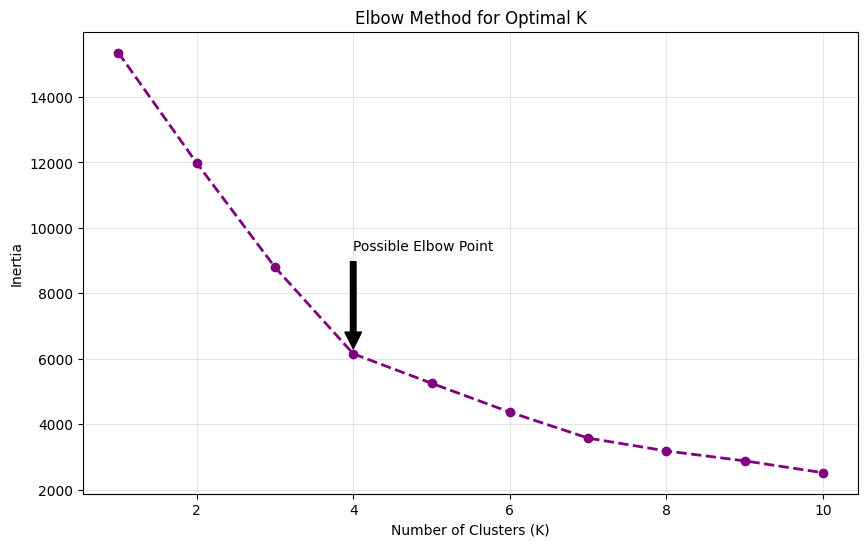

In [131]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

store_profile = df_analysis.groupby('StoreID').agg({
    'OrderID': 'count',                 #Feature 1: Order Volume
    'PickUp_DU': 'mean',                #Feature 2: Prep Time (Efficiency)
    'Is_Hyperdelayed':'mean'            #Feature 3: Defect Rate (Reliability)
}).reset_index()

store_profile.columns=['StoreID','Total_orders','Avg_Prep_Time','Hyper_Delay_Rate']
store_profile['Hyper_Delay_Rate']=round(store_profile['Hyper_Delay_Rate']*100,1)


#Feature Scaling (Crucial for clustering)
scalar = StandardScaler()
feature_to_cluster = ['Total_orders','Avg_Prep_Time','Hyper_Delay_Rate']
store_scaled = scalar.fit_transform(store_profile[feature_to_cluster])

#Elbow Method to Find the Optimal K
inertia = []
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init suppresses warnings
  kmeans.fit(store_scaled)
  inertia.append(kmeans.inertia_) # Inertia = Sum of squared distances to center

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='purple', linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True,alpha=0.3)

plt.annotate('Possible Elbow Point', xy=(4, inertia[3]), xytext=(4, inertia[2]+500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [149]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
store_profile['Cluster'] = kmeans_final.fit_predict(store_scaled)

cluster_summary = store_profile.groupby('Cluster').agg({
    'Total_orders': 'mean',
    'Avg_Prep_Time': 'mean',
    'Hyper_Delay_Rate': 'mean',
    'StoreID':'count'
}).reset_index().round(1)

cluster_summary.columns=['Cluster','Total_Orders','Avg_Prep_Time','Hyper_Delay_Rate','Stores_Count']
print(cluster_summary)

   Cluster  Total_Orders  Avg_Prep_Time  Hyper_Delay_Rate  Stores_Count
0        0          25.3            5.7               5.4          1093
1        1          21.8            1.6               3.5          3678
2        2           3.0            3.3              67.3           143
3        3         305.1            2.6               4.6           204


In [146]:
cluster_mapping = {
    3: 'High Volume Stars',        # High Order volume + Good Performance
    2: 'Critical Risk',            # Very High Hyper-Delay Rate
    1: 'Agile & Reliable (Core)',     # The Majority of the market
    0: 'Slow Preppers'             # Slower than the market average
}

cluster_summary['Segment_Name'] = cluster_summary['Cluster'].map(cluster_mapping)

store_profile['Segment_Name'] = store_profile['Cluster'].map(cluster_mapping)

final_report = cluster_summary[['Segment_Name', 'Total_Orders', 'Avg_Prep_Time', 'Hyper_Delay_Rate', 'Stores_Count']].round(1)
final_report.columns = ['Segment', 'Avg Orders', 'Avg Prep Time (min)', 'Delay Rate (%)', 'Store Count']

print("--- Final Vendor Segmentation Report ---")
final_report

--- Final Vendor Segmentation Report ---


,Segment,Avg Orders,Avg Prep Time (min),Delay Rate (%),Store Count
0,Slow Preppers,25.3,5.7,5.4,1093
1,Agile & Reliable (Core),21.8,1.6,3.5,3678
2,Critical Risk,3.0,3.3,67.3,143
3,High Volume Stars,305.1,2.6,4.6,204


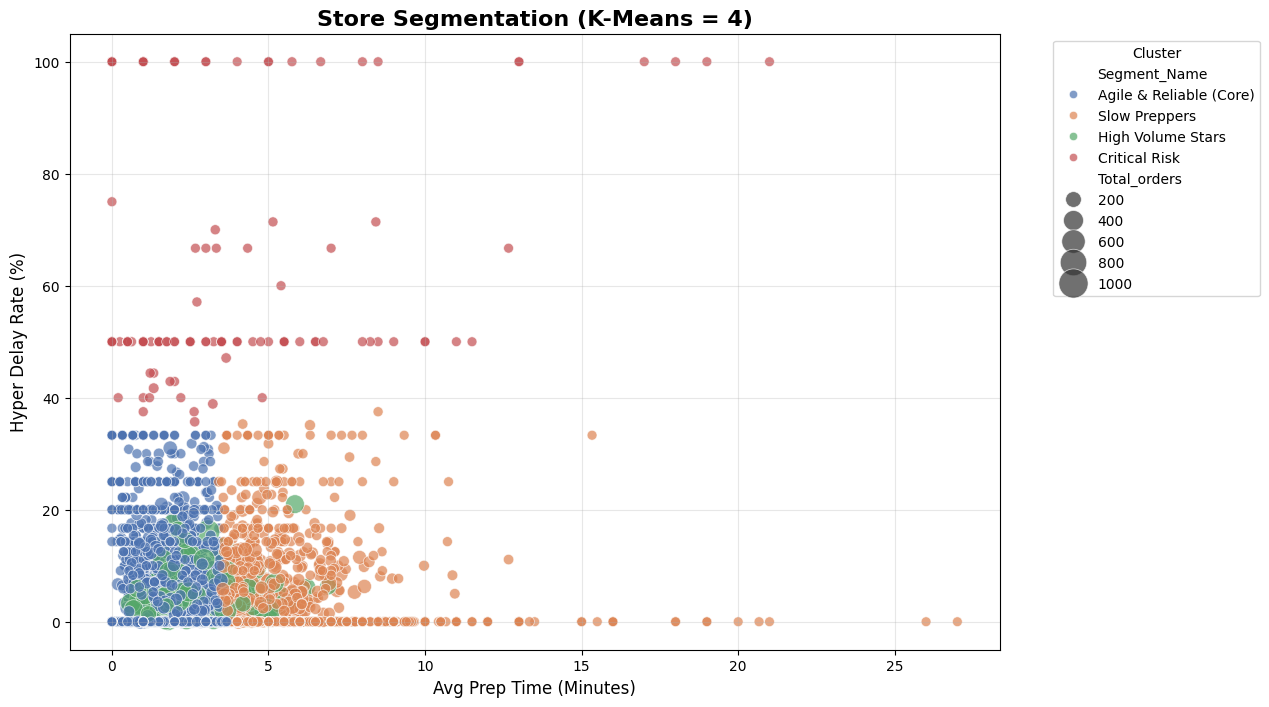

In [151]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=store_profile,
    x='Avg_Prep_Time',
    y='Hyper_Delay_Rate',
    hue='Segment_Name',
    size='Total_orders',
    sizes=(50,500),
    palette='deep',
    alpha=0.7
)

plt.title(f'Store Segmentation (K-Means = {optimal_k})',fontsize=16,fontweight='bold')
plt.xlabel('Avg Prep Time (Minutes)',fontsize=12)
plt.ylabel('Hyper Delay Rate (%)',fontsize=12)
plt.legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True,alpha=0.3)
plt.show()

> #### Biker Segmentation
Doing everything we did for store segmentation, but this time for Biker Segmentation



In [154]:
full_biker_profile.columns

Index(['City', 'DriverID', 'Avg_Biker_Share', 'Avg_Daily_Orders',
       'Active_Days', 'Avg_Speed_kmh', 'Hyper_Delay_Rate',
       'Avg_Time_To_Store'],
      dtype='object')

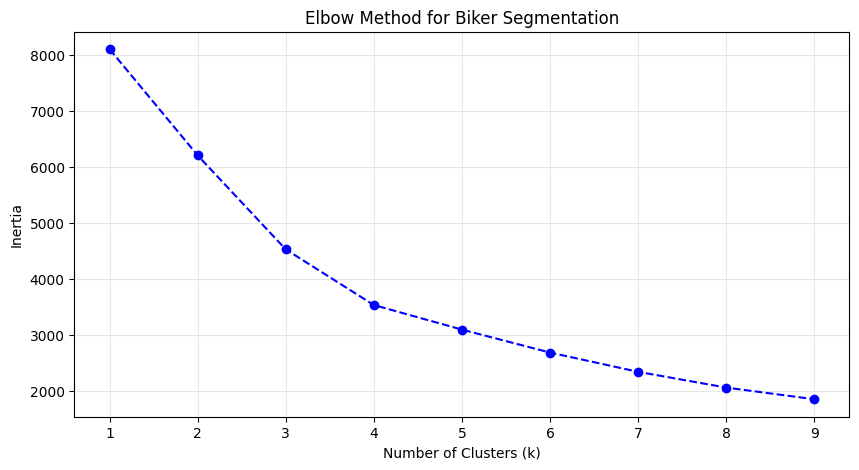

In [156]:
features = ['Avg_Daily_Orders','Avg_Speed_kmh','Hyper_Delay_Rate']

clustering_data = full_biker_profile[features].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Biker Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.show()

In [160]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
full_biker_profile.loc[clustering_data.index, 'Cluster'] = kmeans_final.fit_predict(data_scaled)

biker_cluster_summary = full_biker_profile.groupby('Cluster').agg({
    'Avg_Daily_Orders': 'mean',
    'Avg_Speed_kmh': 'mean',
    'Hyper_Delay_Rate': 'mean',
    'DriverID': 'count'
}).reset_index().round(1)

biker_cluster_summary.columns=['Cluster','Avg_Daily_Orders','Avg_Speed_kmh','Hyper_Delay_Rate','Driver_Count']

print('--Bikers Segment Profiles')
print(biker_cluster_summary)

--Bikers Segment Profiles
   Cluster  Avg_Daily_Orders  Avg_Speed_kmh  Hyper_Delay_Rate  Driver_Count
0      0.0               1.6           27.7               3.8           259
1      1.0               6.0           21.0               5.4          1054
2      2.0               1.4           20.1              17.3           276
3      3.0               2.5           20.6               2.4          1111


In [161]:
biker_labels = {
    1: 'The Hardworkers',      # The most hardworking ones
    0: 'Fast Casuals',         # The speedy ones
    2: 'Critical Risk',        # The offenders
    3: 'Safe & Steady'         # The loyal ones
}

full_biker_profile['Segment_Name'] = full_biker_profile['Cluster'].map(biker_labels)

final_biker_report = full_biker_profile.groupby('Segment_Name').agg({
    'Avg_Daily_Orders': 'mean',
    'Avg_Speed_kmh': 'mean',
    'Hyper_Delay_Rate': 'mean',
    'DriverID': 'count'
}).round(2).reset_index()

final_biker_report.columns = ['Segment', 'Avg Daily Orders', 'Avg Speed (km/h)', 'Failure Rate (%)', 'Driver Count']

print("--- Final Biker Segmentation Report ---")
final_biker_report

--- Final Biker Segmentation Report ---


,Segment,Avg Daily Orders,Avg Speed (km/h),Failure Rate (%),Driver Count
0,Critical Risk,1.42,20.08,17.33,276
1,Fast Casuals,1.61,27.69,3.78,259
2,Safe & Steady,2.52,20.59,2.45,1111
3,The Hardworkers,5.95,20.95,5.43,1054


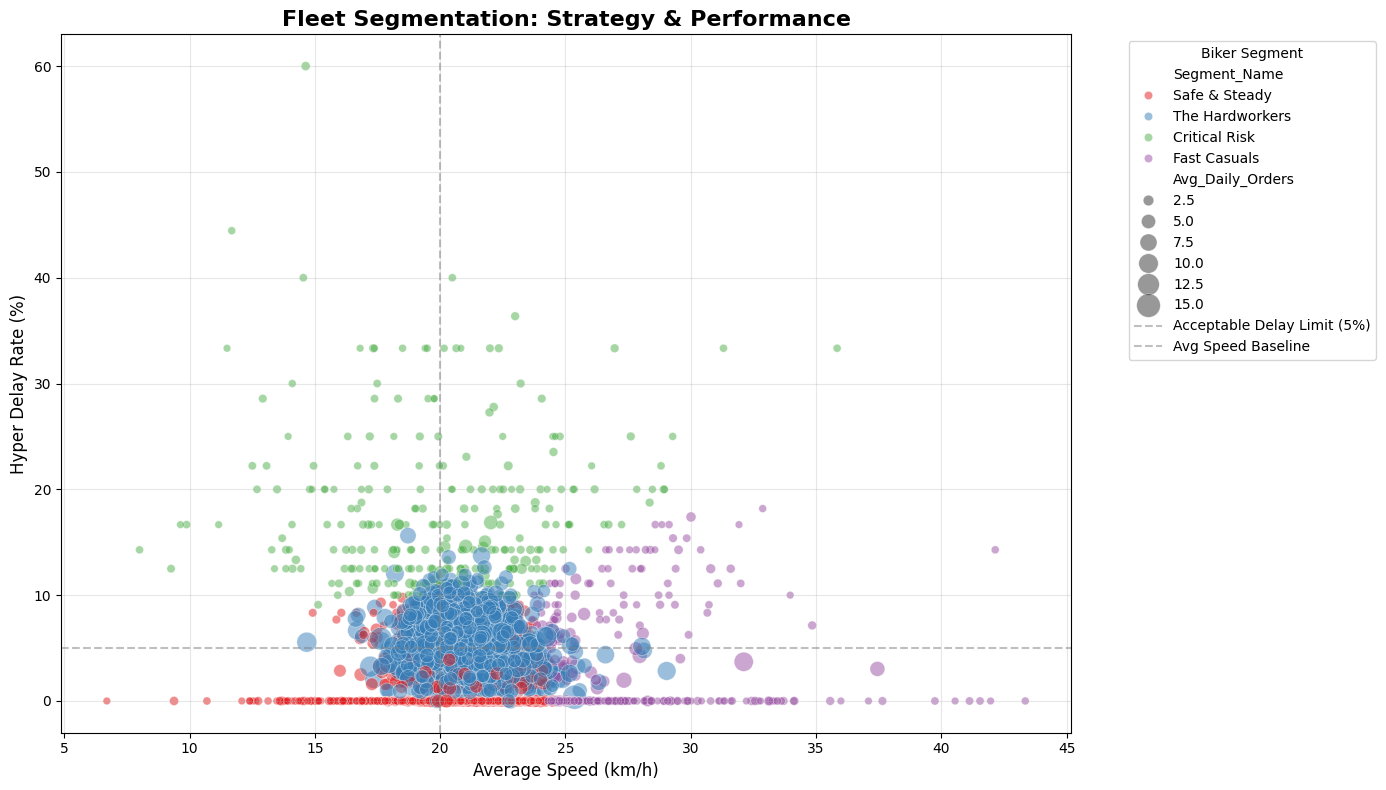

In [163]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=full_biker_profile,
    x='Avg_Speed_kmh',
    y='Hyper_Delay_Rate',
    hue='Segment_Name',
    size='Avg_Daily_Orders',
    sizes=(30, 300),
    palette='Set1',
    alpha=0.5
)


plt.axhline(y=5, color='gray', linestyle='--', alpha=0.5, label='Acceptable Delay Limit (5%)')
plt.axvline(x=20, color='gray', linestyle='--', alpha=0.5, label='Avg Speed Baseline')

plt.title('Fleet Segmentation: Strategy & Performance', fontsize=16, fontweight='bold')
plt.xlabel('Average Speed (km/h)', fontsize=12)
plt.ylabel('Hyper Delay Rate (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Biker Segment')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()